In [9]:
import seaborn as sb
import pandas as pd

In [2]:
df = sb.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
df['per']=df.tip / df.total_bill

In [8]:
df.head()

,sex,smoker,day,time,size,per
0,Female,No,Sun,Dinner,2,0.059447
1,Male,No,Sun,Dinner,3,0.160542
2,Male,No,Sun,Dinner,3,0.166587
3,Male,No,Sun,Dinner,2,0.139780
4,Female,No,Sun,Dinner,4,0.146808


In [7]:
df.drop(['total_bill','tip'],axis=1,inplace=True)

In [13]:
df = pd.get_dummies(df,columns=['sex','smoker','day','time'])

In [14]:
df

,size,per,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,2,0.059447,0,1,0,1,0,0,0,1,0,1
1,3,0.160542,1,0,0,1,0,0,0,1,0,1
2,3,0.166587,1,0,0,1,0,0,0,1,0,1
3,2,0.139780,1,0,0,1,0,0,0,1,0,1
4,4,0.146808,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,3,0.203927,1,0,0,1,0,0,1,0,0,1
240,2,0.073584,0,1,1,0,0,0,1,0,0,1
241,2,0.088222,1,0,1,0,0,0,1,0,0,1
242,2,0.098204,1,0,0,1,0,0,1,0,0,1


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['per'],axis=1)

In [17]:
y = df.per

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [23]:
import sklearn.linear_model as slin
import sklearn.tree as st

In [25]:
#model = slin.LinearRegression()
model = st.DecisionTreeRegressor()

In [26]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
model.score(X_test,y_test)

-0.3116699694980849

In [31]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [32]:
df.head()

,size,per,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,2,0.059447,0,1,0,1,0,0,0,1,0,1
1,3,0.160542,1,0,0,1,0,0,0,1,0,1
2,3,0.166587,1,0,0,1,0,0,0,1,0,1
3,2,0.139780,1,0,0,1,0,0,0,1,0,1
4,4,0.146808,0,1,0,1,0,0,0,1,0,1


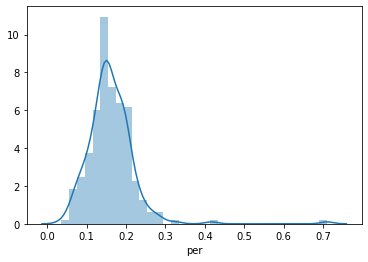

In [33]:
sb.distplot(df.per)

In [34]:
df['good_tip'] = df.per >=0.12 

In [35]:
df.head()

,size,per,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,good_tip
0,2,0.059447,0,1,0,1,0,0,0,1,0,1,False
1,3,0.160542,1,0,0,1,0,0,0,1,0,1,True
2,3,0.166587,1,0,0,1,0,0,0,1,0,1,True
3,2,0.139780,1,0,0,1,0,0,0,1,0,1,True
4,4,0.146808,0,1,0,1,0,0,0,1,0,1,True


In [36]:
df.drop(['per'],axis=1,inplace=True)

In [70]:
X = df.drop(['good_tip'],axis=1)

In [71]:
y = df[['good_tip']]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [73]:
import sklearn.linear_model as slin
import sklearn.tree as st

In [74]:
#model = slin.LogisticRegression()
model = st.DecisionTreeClassifier()

In [75]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
model.score(X_test,y_test)

0.7160493827160493

In [50]:
import sklearn.metrics as mt

In [51]:
y_pred = model.predict(X_test)

In [52]:
mt.confusion_matrix(y_test,y_pred)

array([[ 2, 16],
       [ 3, 60]])